In [1]:
import pandas as pd


data_path = "data/data.csv"
data = pd.read_csv(data_path)
data["Fecha_Hora"] = pd.to_datetime(data["Fecha_Hora"])

Los datos están completos, no existe ninguna celda faltante:

In [2]:
import numpy as np

print(np.isnan(data).any())

Unnamed: 0          False
Fecha_Hora          False
Gto-Alhondiga       False
Gto-Alonso          False
Gto-Hinojo          False
Gto-Pozuelos        False
Gto-SanPedro        False
Irapuato-Hidalgo    False
Leon-Mariachi       False
dtype: bool


Se asume que no existe ninguna relación entre estacionamientos de diferentes ciudades, pero podríamos encontrar que siguen tendencias muy similares a lo largo del tiempo.

# Propuestas de proyecto:

- ¿Se puede predecir la disponibilidad de espacios de estacionmientos en función del tiempo?
- ¿Hasta que punto el estimador de máxima verosimilitud del máximo puede utilizarse para calcular la capacidad de los estacionamientos?

In [3]:
data.max()

Unnamed: 0                         4072
Fecha_Hora          2025-03-20 15:57:43
Gto-Alhondiga                       246
Gto-Alonso                          134
Gto-Hinojo                           81
Gto-Pozuelos                        659
Gto-SanPedro                        315
Irapuato-Hidalgo                    234
Leon-Mariachi                       192
dtype: object

No se enconetró información acerca de la capacidad de los estacionamientos. Puedo preguntar a los empleados de los recintos.

## ¿Qué temas he visto?

1. Reducción de dimensionalidad: ¿Se puede generar un mapa a partir de PCA?
3. Agrupamiento.
¿Es posible reconocer los estacionamientos usando datos de disponibilidad?
5. Bayes óptimo: Definir una función de costo según el precio, la distancia con respecto a mi casa y el procentaje de ocupación promedio para construir un clasificador que me diga a cuál debo dirigirme.
6. Comprobación de supuestos: ¿Hasta qué grado son normales? ¿Hasta qué grado son independientes?
7. Regresión Lineal. Tema pendiente.
8. Regresión logística.


Dado a que encuentro un estacionamiento casi lleno, ¿cuál es el valor esperado de tiempo que requiero para encontrar un espacio en el mismo tiempo? ¿Conviene buscar en otro estacionamiento?

In [4]:
len(data)

4073

In [5]:
data_cp = pd.DataFrame(data)

data_cp["Año"] = data["Fecha_Hora"].apply(lambda x: x.year)
data_cp["Mes"] = data["Fecha_Hora"].apply(lambda x: x.month)
data_cp["Dia"] = data["Fecha_Hora"].apply(lambda x: x.day)
data_cp["Hora"] = data["Fecha_Hora"].apply(lambda x: x.hour)
data_cp["Minuto"] = data["Fecha_Hora"].apply(lambda x: x.minute//15)

In [6]:
by_minute = data_cp.drop(columns=["Fecha_Hora"]).groupby(["Hora", "Minuto"]).mean()

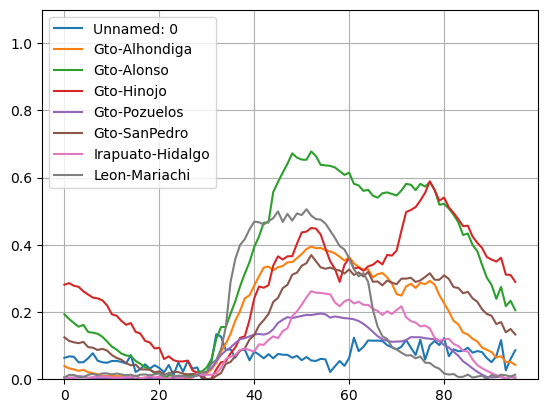

In [7]:
import matplotlib.pyplot as plt

for column in by_minute.drop(columns = ["Año", "Mes", "Dia"]).columns:
    series = by_minute[column].values
    series /= max(series)
    plt.plot(1 - series, label = column)

plt.legend()
plt.ylim((0, 1.1))
plt.grid()

Necesitamos más datos. Hay que crear un scrapper para obtener datos de la página.

Ya programé el scrapper:

https://github.com/L4rralde/Parking_Lots

Usaré una computadora de una sola placa para recolectar los datos. Debo adquirir un cargador de celular y un cable VGA para que opere de forma continua.
Espero que esté operando a partir del 19 de marzo. Por el momento seguiré recapitulando las técnicas estudiadas a lo largo de la materia y valorar si puedo hacer una aplicación web.